In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df =pd.read_csv("/content/laptop_price.csv" , encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [7]:
df.mean()

<ipython-input-7-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


laptop_ID       660.155794
Inches           15.017191
Price_euros    1123.686992
dtype: float64

In [8]:
df.isnull()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [12]:

#Remove the unit after value in Weight and Ram column
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


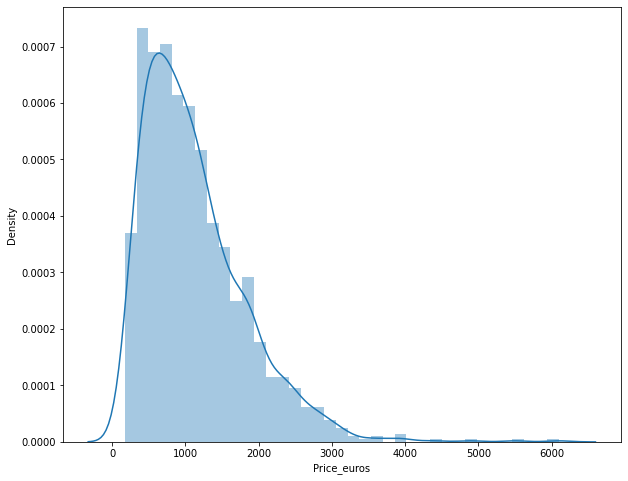

In [27]:

plt.figure(figsize=(10,8))
sns.distplot(df['Price_euros'])
# sns.histplot(df['Price_euros'])
plt.show()


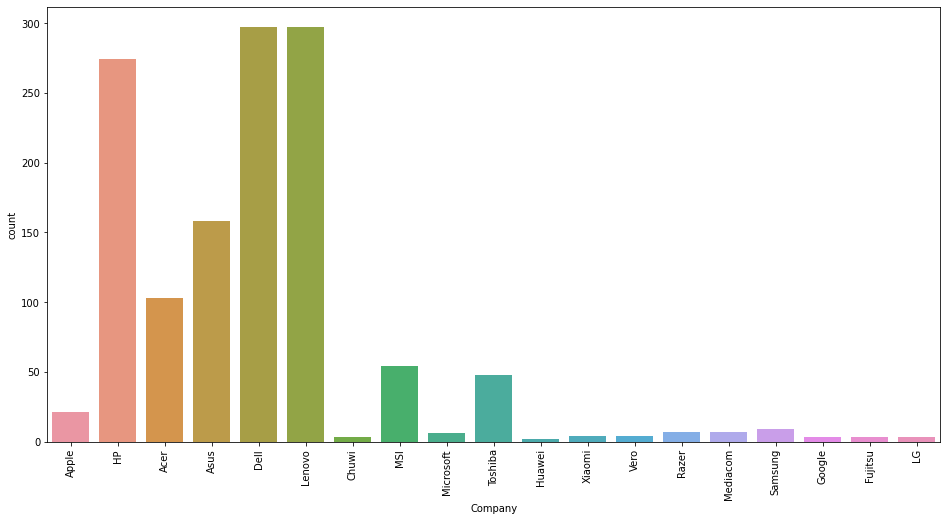

In [32]:
##Count plot(frequency plot) of a company shows that major categories 
plt.figure(figsize=(16,8))
sns.countplot(x=df['Company'])
plt.xticks(rotation='vertical')
# plt.xticks(rotation='horizontal')
plt.show()

In [33]:
df['Price_euros'].mean()

1123.6869915579432

#Company name on laptop price

In [34]:
avg_price = df.groupby("Company")["Price_euros"].mean()

In [35]:
avg_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

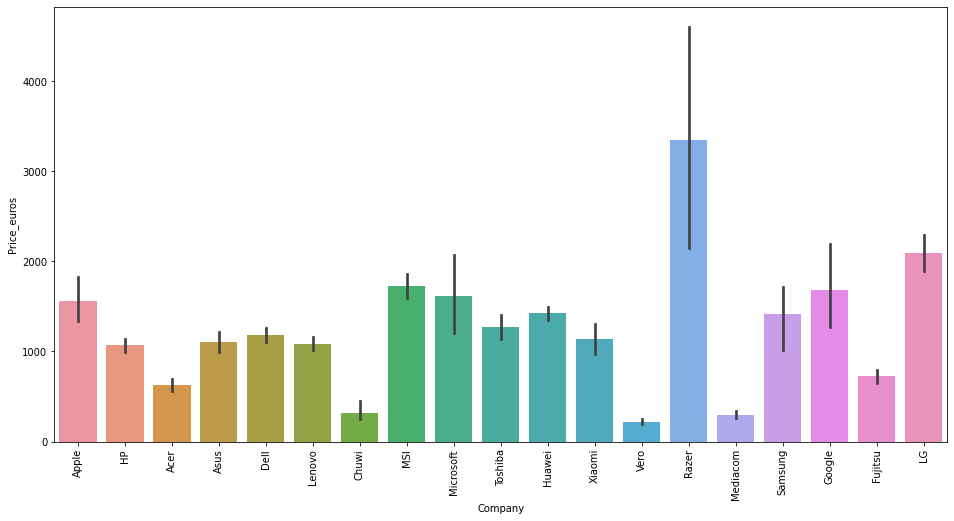

In [46]:
plt.figure(figsize=(16,8))
sns.barplot(x=df['Company'], y=df['Price_euros'])

plt.xticks(rotation="vertical")

plt.show()

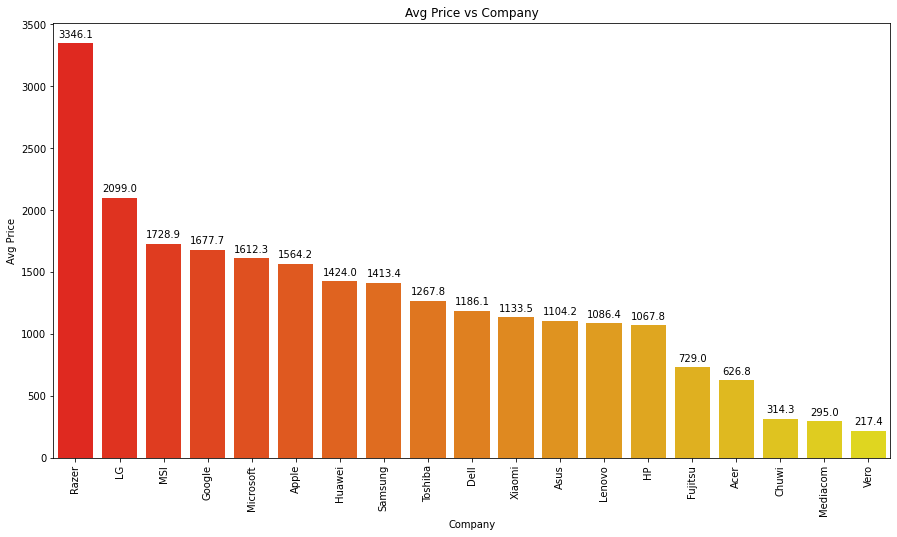

In [51]:
avg_price = df.groupby("Company")["Price_euros"].mean()

avg_price = pd.DataFrame(data = avg_price)
avg_price.columns = ["Avg Price"]
avg_price.sort_values(by="Avg Price",ascending=False,inplace=True)
plt.figure(figsize=(15,8))
splot = sns.barplot(data=avg_price,x=avg_price.index, y = "Avg Price", palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation='vertical')
plt.title('Avg Price vs Company')
plt.show()

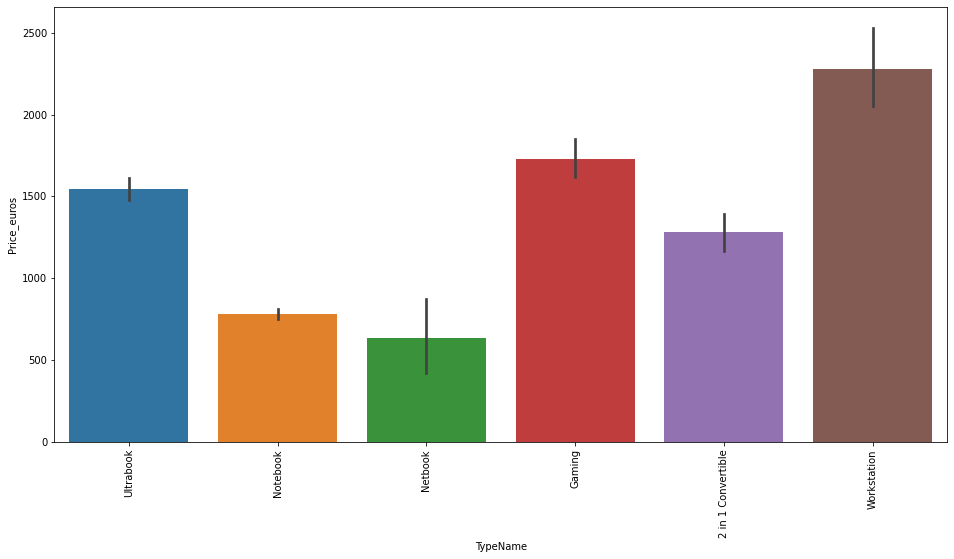

In [53]:
#Impact of Type on laptop price
plt.figure(figsize=(16,8))
sns.barplot(x=df['TypeName'], y=df['Price_euros'])
plt.xticks(rotation="vertical")
plt.show()

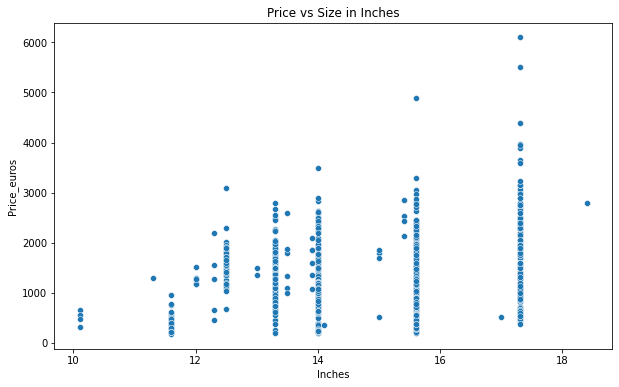

In [59]:
# A Scatter plot is used when both the columns are numerical
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Inches'], y=df['Price_euros'])
plt.title('Price vs Size in Inches')
plt.show()

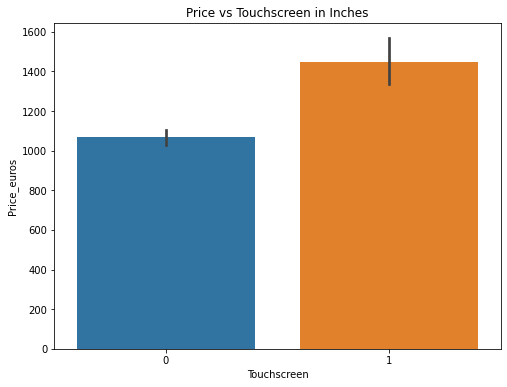

In [57]:
#Plot against price
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

#Plot against price
plt.figure(figsize=(8,6))
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])
plt.title('Price vs Touchscreen in Inches')
plt.show()

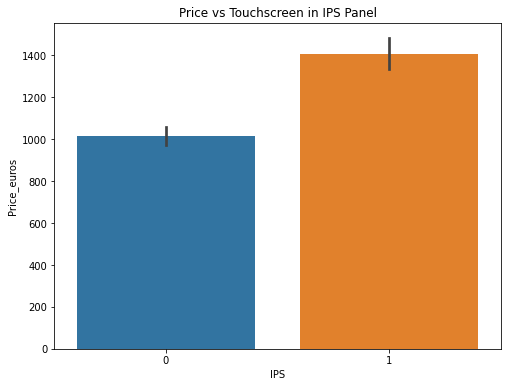

In [58]:
# Extract IPS Channel Presence information
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

#Plot against price
plt.figure(figsize=(8,6))
sns.barplot(x=df['IPS'],y=df['Price_euros'])
plt.title('Price vs Touchscreen in IPS Panel')
plt.show()



```
#Extract X-axis and Y-axis screen resolution dimensions-
1.both the dimension are present at end of a string, separated with a cross sign
2.The string is splitted with space and the last string is accessed from the list.
3. Then the string is splitted with a cross sign and the zero and first index is accessed for X and Y-axis dimensions
```



In [60]:
def findXresolution(s):
    return s.split()[-1].split("x")[0]
def findYresolution(s):
    return s.split()[-1].split("x")[1]

#finding the x_res and y_res from screen resolution
df['X_res'] = df['ScreenResolution'].apply(lambda x: findXresolution(x))
df['Y_res'] = df['ScreenResolution'].apply(lambda y: findYresolution(y))

#convert to numeric
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [61]:
df.corr()['Price_euros'].sort_values(ascending=False)

Price_euros    1.000000
X_res          0.556529
Y_res          0.552809
IPS            0.252208
Touchscreen    0.191226
Inches         0.068197
laptop_ID      0.067830
Name: Price_euros, dtype: float64

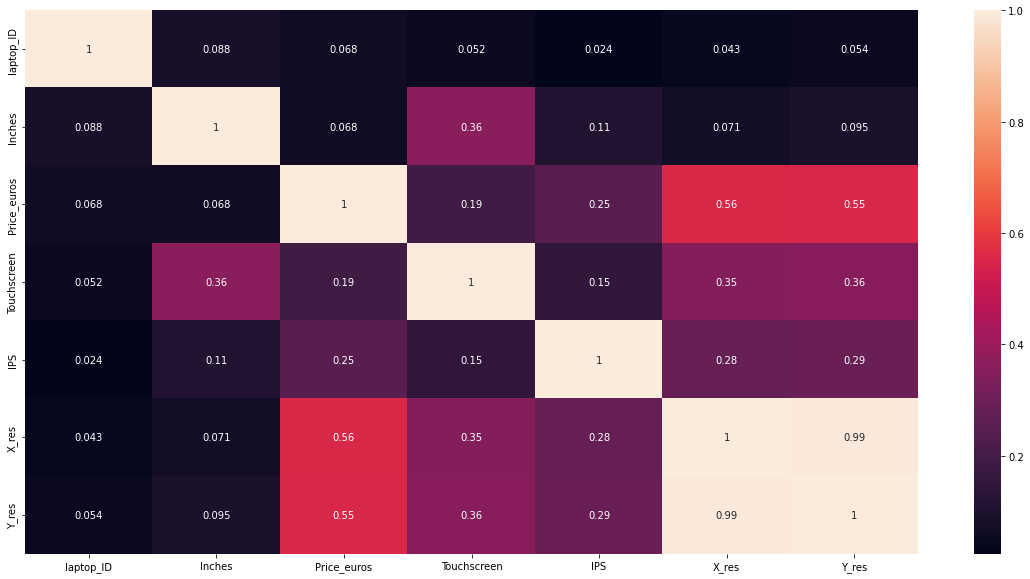

In [69]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

#Creating PPI(Pixel Per Inches) from inches, X and Y resolution
1.correlation of columns with price shows that inches do not have a strong correlation but X and Y-axis resolution have a very strong resolution
2.So, these three columns can be converted to a single column - as Pixel per inches(PPI)

3.dp = √(w2 + h2), Where w is the number of pixels that appear along the horizontal edge, and h is the number of pixels that appear along the vertical edge.

4.PPI = dp / di, Where di is the diagonal screen size in inches.


In [71]:
#creates a new column 'PPI' in the dataframe "df" by computing the root mean square (RMS) of the X_res and Y_res columns and dividing the result by the Inches column. 
#The new column 'PPI' is stored as a float data type.
df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float') 
df.corr()['Price_euros'].sort_values(ascending=False)

Price_euros    1.000000
X_res          0.556529
Y_res          0.552809
PPI            0.473487
IPS            0.252208
Touchscreen    0.191226
Inches         0.068197
laptop_ID      0.067830
Name: Price_euros, dtype: float64

In [72]:
# Drop the extra columns which are not of use
df.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)

In [75]:
#CPU Column
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [76]:
#first we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def fetch_processor(x):
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'
df['Cpu_brand'] = df['Cpu'].apply(lambda x: fetch_processor(x))

In [77]:

df.drop('Cpu', axis= 1, inplace=True)

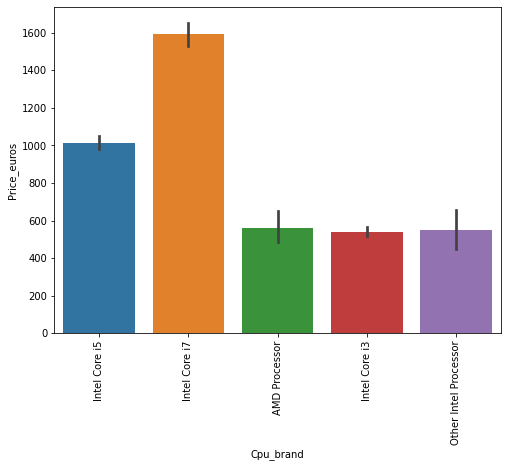

In [79]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Cpu_brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


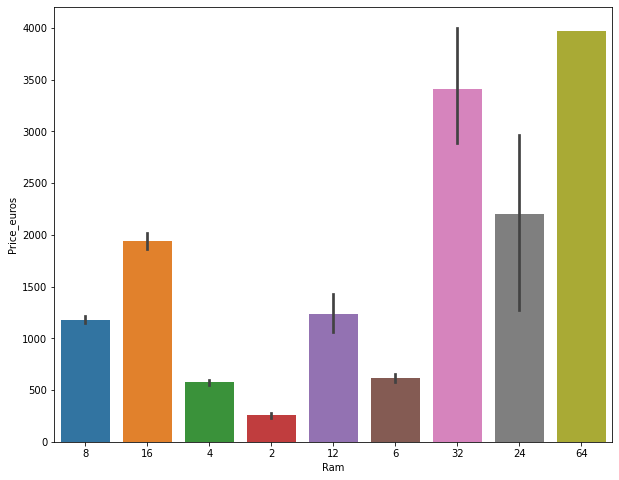

In [86]:
plt.figure(figsize=(10,8))
sns.barplot(df['Ram'], df['Price_euros'])
# sns.boxplot(df['Ram'], df['Price_euros'])
plt.show()

In [88]:
df.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [90]:
#preprocessing
new = df['Memory'].str.split("+", n = 1, expand = True)

df['first']= new[0]
df['first']=df['first'].str.strip() # remove space at the start and end of the string
df['first'].fillna("0", inplace = True)

df['second']= new[1]
df['second']=df['second'].str.strip()
df['second'].fillna("0", inplace = True)

#binary encoding
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

#binary encoding
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [91]:
# trying to convert to numerical value
df['first'] = df['first'].str.replace("HDD", "")
df['first'] = df['first'].str.replace("SSD", "")
df['first'] = df['first'].str.replace("Flash Storage", "")
df['first'] = df['first'].str.replace("Hybrid", "")

df['first'] = df['first'].str.replace(".0TB", "000") # making different unit to same unit
df['first'] = df['first'].str.replace("TB", "000")
df['first'] = df['first'].str.replace("GB", "") # removing GB Unit
df['first'] = df['first'].astype(int)

# trying to convert to numerical value
df['second'] = df['second'].str.replace("HDD", "")
df['second'] = df['second'].str.replace("SSD", "")
df['second'] = df['second'].str.replace("Flash Storage", "")
df['second'] = df['second'].str.replace("Hybrid", "")

df['second'] = df['second'].str.replace(".0TB", "000") 
df['second'] = df['second'].str.replace("TB", "000") # making different unit to same unit
df['second'] = df['second'].str.replace("GB", "") # removing GB Unit

df['second'] = df['second'].astype(int)

<ipython-input-91-80cd35c71266>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(".0TB", "000") # making different unit to same unit
<ipython-input-91-80cd35c71266>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(".0TB", "000")


In [92]:
#finalize the columns by keeping value
df['HDD']=(df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD']=(df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash_Storage']=(df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage'])
#Drop the un required columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [95]:
df.sample(4)

,laptop_ID,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
937,951,MSI,GP62M Leopard,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.2,1199.00,0,0,141.211998,Intel Core i7,1000,128,0,0
702,710,Lenovo,IdeaPad 320-15ABR,Notebook,8,1000 HDD,AMD Radeon R7,Windows 10,2.2,429.00,0,0,100.454670,AMD Processor,1000,0,0,0
80,82,Dell,Latitude 5590,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.88,1096.16,0,1,141.211998,Intel Core i5,0,256,0,0
1232,1250,Dell,Inspiron 3567,Notebook,8,1000 HDD,Intel HD Graphics 620,Windows 10,2.3,469.01,1,0,100.454670,Intel Core i3,1000,0,0,0


In [97]:
df.drop(columns=['Hybrid','Flash_Storage','Memory',],inplace=True)

In [98]:
# Which brand GPU is in laptop
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])
#there is only 1 row of ARM GPU so remove it
data = df[df['Gpu_brand'] != 'ARM']
data.drop(columns=['Gpu'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [99]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
data['os'] = data['OpSys'].apply(cat_os)
data.drop(columns=['OpSys'],inplace=True)

<ipython-input-99-407719c3abe6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['os'] = data['OpSys'].apply(cat_os)


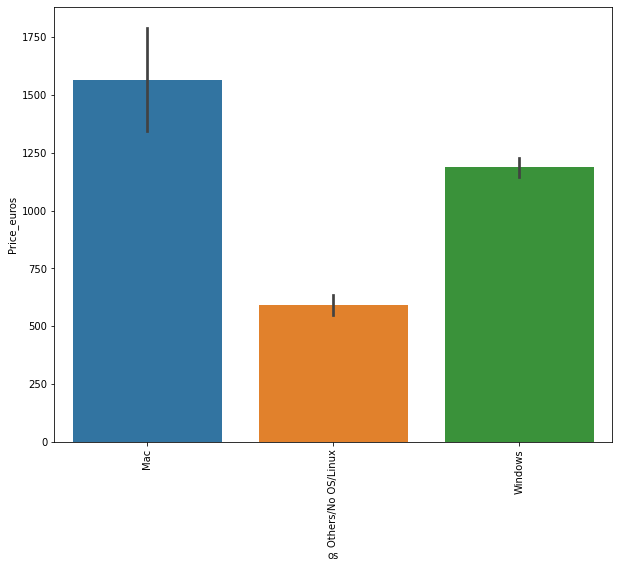

In [101]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['os'],y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


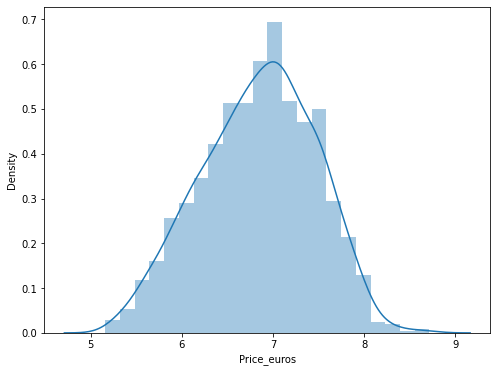

In [103]:
plt.figure(figsize=(8,6))
sns.distplot(np.log(data['Price_euros']))
plt.show()

In [104]:
df.to_csv('laptop_clean.csv')